In [10]:
from numpy import genfromtxt,array,linalg,zeros,apply_along_axis

# reading the iris dataset in the csv format    
# (downloaded from http://aima.cs.berkeley.edu/data/iris.csv)
data = genfromtxt('iris.csv', delimiter=',',usecols=(0,1,2,3))
# normalization to unity of each pattern in the data
data = apply_along_axis(lambda x: x/linalg.norm(x),1,data)

In [11]:
from minisom import MiniSom
### Initialization and training ###
som = MiniSom(7,7,4,sigma=1.0,learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data,100) # training with 100 iterations
print("\n...ready!")


Training...

...ready!


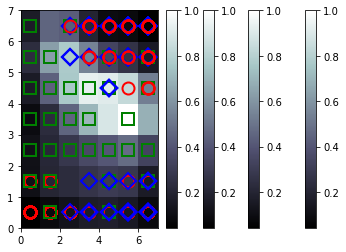

In [12]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
# loading the labels
target = genfromtxt('iris.csv',
                    delimiter=',',usecols=(4),dtype=str)
t = zeros(len(target),dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2
# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
    w = som.winner(xx) # getting the winner
 # palce a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',
   markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)
#axis([0,som.weights.shape[0],0,som.weights.shape[1]])
show() # show the figure

In [ ]:
s